In [1]:
#pip install pandas_datareader
# !pip install scipy
# !pip install --upgrade tensorflow
# !pip install plotly
# !pip install pycirclize
# !pip install chord

In [94]:
# Import necessary libraries and modules
import pandas as pd
import datetime as dt 
import yfinance as yf
import json
from requests import Session
import requests
from requests_cache import CacheMixin, SQLiteCache
from requests_ratelimiter import LimiterMixin, MemoryQueueBucket
from pyrate_limiter import Duration, RequestRate, Limiter
class CachedLimiterSession(CacheMixin, LimiterMixin, Session):
    pass
import requests_cache
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as sc
from scipy.cluster.hierarchy import fcluster
from pycirclize import Circos
from IPython.display import Image
import holoviews as hv
import hvplot.pandas
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from scipy.optimize import minimize
import plotly.graph_objects as go


# GET STOCK DATA

In [3]:
# # Session Limiter for the API call to Yahoo Finance to prevent timing out during function call
# session = CachedLimiterSession(
#     limiter=Limiter(RequestRate(2, Duration.SECOND*5)),  #max 2 requests per 5 seconds
#     bucket_class=MemoryQueueBucket,
#     backend=SQLiteCache("yfinance.cache"),
# )

In [4]:
# # Current list of Standard & Poor 500 companies from Wikipedia: 
# sp500_companies = pd.read_csv("/Users/rosario/Code/CodeOp/Group-Project-1/sp500_companies.csv")

In [5]:
# # Function to scrape the historical data including Adjusted Closing Price from Yahoo finance
# # Return a data frame with Date as the index

# def get_ticker_history(df, period=" "):
#     ticker_data = {}
    
#     # Iterate through each row of the DataFrame
#     for index, row in df.iterrows():
#         ticker = row['Symbol'] 
#         print("Fetching data for ticker:", ticker)  # Print the ticker being processed
#         # Fetch historical data for the ticker
#         history_data = yf.download(tickers=ticker, period=period)
#         # Add the ticker symbol as a feature in the historical data DataFrame
#         history_data['Symbol'] = ticker
#         # Store the historical data in the dictionary
#         ticker_data[ticker] = history_data
        
#     # Concatenate historical data for all tickers into a single DataFrame
#     combined_data = pd.concat(ticker_data.values())
#     combined_data.index.name = 'Date'  # Set the name of the index to 'Date'
    
#     return combined_data

In [6]:
# # Run the function to call the API and start the data scraping

# sp500_history = get_ticker_history(sp500_companies, period="max")

In [8]:
# Read saved date base

sp500_history = pd.read_csv("/Users/rosario/Code/CodeOp/Group-Project-1/sp500_history.csv")

In [9]:
# sp500_history has over 4 million rows

sp500_history.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.405937,254509.0,MMM
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.408989,505190.0,MMM
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.408989,254509.0,MMM
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.398306,376979.0,MMM
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.396017,399942.0,MMM


In [10]:
# Convert date column to datetime

sp500_history['Date'] = pd.to_datetime(sp500_history['Date'])

In [11]:
# Set 'Date' as index

sp500_history.set_index('Date', inplace=True)

In [13]:
sp500_history.info()

# GET ECONOMIC INDICATORS

## GDP per capita - data returned is quarterly gdp per capita

In [28]:
# # using Api key, scrape alphavantage.co GDP per capita data

# url = 'https://www.alphavantage.co/query?function=REAL_GDP_PER_CAPITA&apikey=06N85DP7BER4MKDB'
# r = requests.get(url)
# gdp_data = r.json()

In [27]:
# # Create dataframe from json object
# gdp_per_capita = pd.DataFrame(gdp_data['data']) 
# gdp_per_capita['value'] = gdp_per_capita['value'].astype(float)
# # Set datetime as index
# gdp_per_capita.set_index('date', inplace =True) 
# # Rename 'value' to 'gdp'
# gdp_per_capita.rename(columns={'value': 'gdp'}, inplace=True) 
# # Sort dataframe from oldest to newest
# gdp_per_capita = gdp_per_capita.sort_index() 

In [29]:
# gdp_per_capita.info()

In [126]:
# Subset data frame to the last 10 years 

# gdp_df = gdp_per_capita.loc['2014-01-01':'2024-03-31']

In [128]:
# Save as csv to share with team 

# gdp_df.to_csv('gdp_df.csv', index=True)

## Inflation - data returned is annual inflation rate

In [30]:
# # using Api key, scrape alphavantage.co inflation data

# url = 'https://www.alphavantage.co/query?function=INFLATION&apikey=06N85DP7BER4MKDB'
# r = requests.get(url)
# inflation_data = r.json()

In [31]:
# # Create dataframe from json object
# inflation = pd.DataFrame(inflation_data['data']) 
# inflation['value'] = inflation['value'].astype(float)
# # Set datetime as index
# inflation.set_index('date', inplace =True) 
# # Rename 'value' to 'inflation'
# inflation.rename(columns={'value': 'inflation'}, inplace=True) 
# # Sort dataframe from oldest to newest
# inflation = inflation.sort_index() 

In [33]:
# inflation.info()

In [34]:
# Subset data frame to the last 10 years 

# inflation_df = inflation.loc['2014-01-01':'2024-03-31']

In [35]:
# Save as csv to share with team 

# inflation_df.to_csv('inflation_df.csv', index=True)

## Unemployment Rate - data returned is monthly unemployment data

In [36]:
# # using Api key, scrape alphavantage.co unemployment rate data

# url = 'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=06N85DP7BER4MKDB'
# r = requests.get(url)
# unemployment_data = r.json()

In [37]:
# # Create dataframe from json object
# unemployment = pd.DataFrame(unemployment_data['data']) 
# unemployment['value'] = unemployment['value'].astype(float)
# # Set datetime as index
# unemployment.set_index('date', inplace =True) 
# # Rename 'value' to 'unemployment'
# unemployment.rename(columns={'value': 'unemployment'}, inplace=True) 
# # Sort dataframe from oldest to newest
# unemployment = unemployment.sort_index() 

In [38]:
# unemployment.info()

In [39]:
# Subset data frame to the last 10 years 

# unemployment_df = unemployment.loc['2014-01-01':'2024-03-31']

In [40]:
# Save as csv to share with team 

# unemployment_df.to_csv('unemployment_df.csv', index=True)

# Outline of the presentation:
## Introduction: Modern Portfolio Theory History and Basics (Syd)
## Objective: see master_notebook (??)
## Part 1: Pairwise Correlations (??)
## Part 2: Building a portfolio with Efficient Frontier (??)
## Part 3: Predictive models for stock prices (??)

## Part 1: Pairwise Correlations

In [41]:
# Read saved date base

df_part1 = pd.read_csv("/Users/rosario/Code/CodeOp/Group-Project-1/sp500_combined.csv")

In [43]:
# Convert 'Date' column to datetime
df_part1['Date'] = pd.to_datetime(df_part1['Date'])  

# Set 'Date' column as index
df_part1.set_index('Date', inplace=True)  

In [45]:
# Select the columns for the correlations

selected_columns = ['GICS Sector', 'Symbol', 'Adj Close']
df_part1 = df_part1[selected_columns]
df_part1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1226068 entries, 2014-04-01 to 2024-03-28
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   GICS Sector  1226068 non-null  object 
 1   Symbol       1226068 non-null  object 
 2   Adj Close    1226068 non-null  float64
dtypes: float64(1), object(2)
memory usage: 37.4+ MB


In [47]:
# Create a column for the calculated log value of the Adjusted Closing Price

df_part1['Log_Adj_Close'] = np.log(df_part1['Adj Close'])
df_part1.head()

,GICS Sector,Symbol,Adj Close,Log_Adj_Close
Date,,,,
2014-04-01,Industrials,MMM,76.270012,4.334280
2014-04-02,Industrials,MMM,75.973930,4.330390
2014-04-03,Industrials,MMM,76.052124,4.331419
2014-04-04,Industrials,MMM,75.895737,4.329361
2014-04-07,Industrials,MMM,75.080139,4.318556


In [48]:
# Pivot the dataframe to show the 'Date' as the index for timeseries data
# columns as "GICS Sector", values are Log_adj_close column and aggregate 
#the mean of the Log_adj_close per daily value 

pivot_df = df_part1.pivot_table(index='Date', columns='GICS Sector', values='Log_Adj_Close', aggfunc='mean')
pivot_df.head()

GICS Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Date,,,,,,,,,,,
2014-04-01,3.423455,3.996665,3.635249,3.838805,3.690468,4.009264,3.870418,3.501336,3.826890,3.726187,3.305446
2014-04-02,3.423211,4.001898,3.635293,3.843113,3.692476,4.014550,3.875537,3.503208,3.833971,3.725508,3.305085
2014-04-03,3.414846,3.996290,3.638149,3.847506,3.691130,4.012202,3.874369,3.492563,3.833614,3.722461,3.308434
2014-04-04,3.395996,3.977981,3.630151,3.841237,3.674558,3.991284,3.858754,3.469738,3.825446,3.721972,3.313790
2014-04-07,3.380499,3.957151,3.629783,3.821653,3.654642,3.977089,3.841824,3.456560,3.809128,3.721574,3.309408


In [50]:
# Calculate log returns
log_returns = np.log(pivot_df / pivot_df.shift(1))

# Drop the first row as it contains NaN values due to the shift
log_returns = log_returns.dropna()


In [51]:
# Compute the Correlation Matrix

correlation_matrix = log_returns.corr()
print(correlation_matrix.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Communication Services to Utilities
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Communication Services  11 non-null     float64
 1   Consumer Discretionary  11 non-null     float64
 2   Consumer Staples        11 non-null     float64
 3   Energy                  11 non-null     float64
 4   Financials              11 non-null     float64
 5   Health Care             11 non-null     float64
 6   Industrials             11 non-null     float64
 7   Information Technology  11 non-null     float64
 8   Materials               11 non-null     float64
 9   Real Estate             11 non-null     float64
 10  Utilities               11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB
None


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
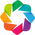

Loading BokehJS ...

:Chord   [source,target]   (value,source_highest,source_lowest,target_highest,target_lowest)

In [53]:
# Initialize Holoviews
hv.extension('bokeh')
output_notebook()

sectors = ['Information Technology', 'Health Care', 'Financials', 'Consumer Discretionary', 'Industrials', 'Communication Services', 'Consumer Staples', 'Energy', 'Materials', 'Real Estate', 'Utilities']
correlation_data = np.random.rand(len(sectors), len(sectors))
np.fill_diagonal(correlation_data, 1)
correlation_matrix_df = pd.DataFrame(correlation_data, index=sectors, columns=sectors)

# Ensure that the index and columns of the DataFrame match
if not set(correlation_matrix_df.index) == set(correlation_matrix_df.columns):
    raise ValueError("Index and columns of the correlation matrix must match.")

# Prepare the DataFrame suitable for a chord diagram
data = []

for i, sector1 in enumerate(correlation_matrix_df.index):
    for j, sector2 in enumerate(correlation_matrix_df.columns):
        if i != j:
            try:
                value = correlation_matrix_df.at[sector1, sector2]
                data.append([sector1, sector2, value])
            except KeyError as e:
                print(f"KeyError: {e}")

df = pd.DataFrame(data, columns=['source', 'target', 'value'])

# Check if the DataFrame was created successfully
if df.empty:
    raise ValueError("The DataFrame for the chord diagram is empty. Please check the input correlation matrix.")

# Find the highest and lowest correlations for each sector
highest_correlation = correlation_matrix_df.replace(1, np.nan).max(axis=1)
lowest_correlation = correlation_matrix_df.replace(1, np.nan).min(axis=1)

# Create a dictionary for tooltip information
tooltip_info = {sector: (f'Highest: {highest_correlation[sector]:.2f}', f'Lowest: {lowest_correlation[sector]:.2f}')
                for sector in correlation_matrix_df.index}

# Add tooltip information to the DataFrame
df['source_highest'] = df['source'].map(lambda x: tooltip_info[x][0])
df['source_lowest'] = df['source'].map(lambda x: tooltip_info[x][1])
df['target_highest'] = df['target'].map(lambda x: tooltip_info[x][0])
df['target_lowest'] = df['target'].map(lambda x: tooltip_info[x][1])

# Create a chord diagram using Holoviews
chord = hv.Chord(df)
chord.opts(
    width=800, height=800,
    labels='index',
    node_color='index',
    cmap='Category20',
    edge_color='value',
    edge_cmap='Category20',
    edge_line_width=2,
    tools=['hover'],
    inspection_policy='edges',
    edge_hover_line_color='black',
    node_hover_line_color='black',
)

# Customize hover tool to show highest and lowest correlations
hover = HoverTool(tooltips=[
    ('Source', '@source'),
    ('Target', '@target'),
    ('Value', '@value{0.00}'),
    ('Source Highest', '@source_highest'),
    ('Source Lowest', '@source_lowest'),
    ('Target Highest', '@target_highest'),
    ('Target Lowest', '@target_lowest')
])

# Show the chord diagram with the hover tool
plot = hv.render(chord)
plot.add_tools(hover)

hv.output(chord)


#### Top 2 companies per sector: 
Info Tech: Apple and Microsoft

Health Care: United Health Group and Johnson & Johnson

Financials: Berkshire Hathaway and JP Morgan Chase

Consumer Discretionary: Amazon and Tesla

etc...
link to source
https://www.visualcapitalist.com/complete-breakdown-of-sp-500-companies/

### Pairwise conclusion:

Using pairwise correlation, we can calculate the mean log of the Adjusted closing price over the last 10 years. Using these correlations, we create a matrix that can visualize which sectors are the least correlated. Using these diagram above if we want to invest in Sector A, Sector B and Sector C, we can check if they are strongly or weakly correlated so that we can have the best diversified portfolio. 

## Part 2:  EFFICIENT FRONTIER

Now that we know which sectors are weakly correlated, we select the assets from those sectors that will make up our portfolio. 

In [54]:
df_part2 = pd.read_csv("/Users/rosario/Code/CodeOp/Group-Project-1/sp500_combined.csv")

In [55]:
df_part2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry
0,2014-04-01,113.612038,114.255852,113.436455,114.155518,76.270012,2835477.0,MMM,3M,Industrials,Industrial Conglomerates
1,2014-04-02,113.704010,113.921402,113.152176,113.712372,75.973930,3924554.0,MMM,3M,Industrials,Industrial Conglomerates
2,2014-04-03,113.896324,114.707359,113.461540,113.829430,76.052124,3200735.0,MMM,3M,Industrials,Industrial Conglomerates
3,2014-04-04,114.464882,115.192307,113.520065,113.595322,75.895737,3271419.0,MMM,3M,Industrials,Industrial Conglomerates
4,2014-04-07,113.553513,113.921402,112.366219,112.374580,75.080139,3357770.0,MMM,3M,Industrials,Industrial Conglomerates


In portfolio building we are taking 3 random assets and plotting the historical Adjusted Price to see how they have performed over the last 10 years. 

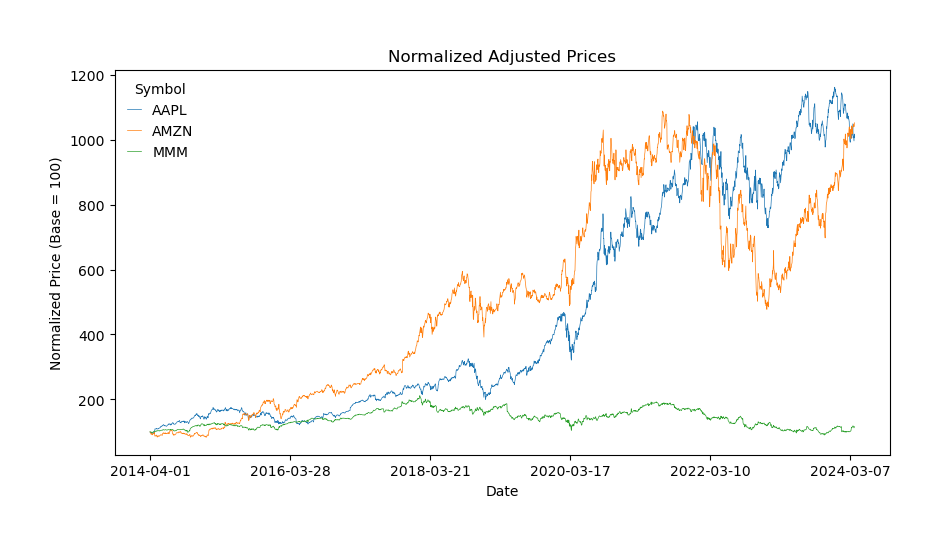

In [57]:
assets = ['MMM', 'AAPL', 'AMZN']

# Filter sp500_combined for the desired symbols
filtered_data = df_part2[df_part2['Symbol'].isin(assets)]

# Pivot the dataframe to have dates as index and symbols as columns
pf_data = filtered_data.pivot(index='Date', columns='Symbol', values='Adj Close')

# Normalize the data
normalized_data = (pf_data / pf_data.iloc[0] * 100)

# Plot the normalized data
normalized_data.plot(figsize=(10, 5))
plt.title('Normalized Adjusted Prices')
plt.ylabel('Normalized Price (Base = 100)')
plt.xlabel('Date')
plt.legend(title='Symbol')
plt.show()

In Portfolio Diversification and Risk Management
Log returns facilitate the measurement of risk and correlation between assets, which is crucial for portfolio diversification. The properties of log returns make it easier to apply risk management techniques, such as Value at Risk (VaR) and stress testing.

We are using Log returns instead of percentage returns: 

Log returns are a common way to measure the performance of an investment because they are additive over time. if you have two log returns, you can add them together to get the total log return for the period.

Another advantage is that they are symmetric around zero.

That is, positive and negative log returns are equally far from zero on a logarithmic scale. making it easy to compare their performance.

A third advantage of using log returns(and this is more of an assumption) is that they are following approximately a normal distribution, which makes it convenient to analyze and model using statistical methods.

In [83]:
# Calculate the Log returns 

log_returns = np.log(pf_data/pf_data.shift(1)).dropna()

# Calculate the mean log returns

log_mean = log_returns.mean()*250

# Calculate the covariance 

log_returns.cov()*250

# Calculate the correlation

log_returns.corr()

print(f"The log value of the returns: {log_returns}")
print(f"The mean of the Log returns: {log_returns.mean() * 250}")
print(f"The covariance of the Log returns: {log_returns.cov()*250}")
print(f"The correlation of the Log returns: {log_returns.corr()}")

The log value of the returns: Symbol          AAPL      AMZN       MMM
Date                                    
2014-04-02  0.001660 -0.003008 -0.003890
2014-04-03 -0.006954 -0.024691  0.001029
2014-04-04 -0.013021 -0.032350 -0.002058
2014-04-07 -0.015825 -0.016356 -0.010804
2014-04-08 -0.000058  0.028878  0.003268
...              ...       ...       ...
2024-03-22  0.005296  0.004033 -0.010156
2024-03-25 -0.008335  0.004685 -0.018335
2024-03-26 -0.006695 -0.007877 -0.021305
2024-03-27  0.020991  0.008544  0.018918
2024-03-28 -0.010615  0.003054  0.014051

[2515 rows x 3 columns]
The mean of the Log returns: Symbol
AAPL    0.229519
AMZN    0.233906
MMM     0.014994
dtype: float64
The covariance of the Log returns: Symbol      AAPL      AMZN       MMM
Symbol                              
AAPL    0.079723  0.051089  0.027652
AMZN    0.051089  0.107533  0.022372
MMM     0.027652  0.022372  0.055696
The correlation of the Log returns: Symbol      AAPL      AMZN       MMM
Symbol           

In [84]:
# Create an array of portfolio returns and portfolio volatilities for a 1000 random portfolios

log_returns = log_returns
log_returns_mean = log_mean
assets = ['AAPL', 'AMZN', 'MMM']

portfolio_returns = []
portfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    portfolio_returns.append(np.sum(weights * log_returns_mean))
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
                    
portfolio_returns1 = np.array(portfolio_returns)
portfolio_volatilities1 = np.array(portfolio_volatilities)
                                  
portfolio_returns, portfolio_volatilities

([0.14377884518079506,
  0.13907709210840852,
  0.1814825585013085,
  0.20977315799001348,
  0.08389043324115819,
  0.18482713947168886,
  0.20319958436693336,
  0.13853634592353875,
  0.08717707461887807,
  0.19411196496595767,
  0.22506182259937496,
  0.13368984268126885,
  0.19875840627333669,
  0.23099384415001273,
  0.13791546955253636,
  0.2278572983515116,
  0.2005000907400094,
  0.2125115633654175,
  0.1372338915111293,
  0.2106073267731993,
  0.041189593830363275,
  0.12883315343476032,
  0.11265012039700631,
  0.17207288633160372,
  0.2127986475494314,
  0.1980436549450387,
  0.19768188493202055,
  0.14044700600887727,
  0.18275532254894616,
  0.21931159930646232,
  0.0998576597634658,
  0.13890209074960072,
  0.12091544755808337,
  0.16423992820454159,
  0.16703850480053603,
  0.21739153142472414,
  0.18610900539696662,
  0.19294456092099388,
  0.16423951818184993,
  0.16298486374362983,
  0.21290550882058984,
  0.07657536756313037,
  0.17297824984113075,
  0.142002511356241

Text(0, 0.5, 'Expected Return')

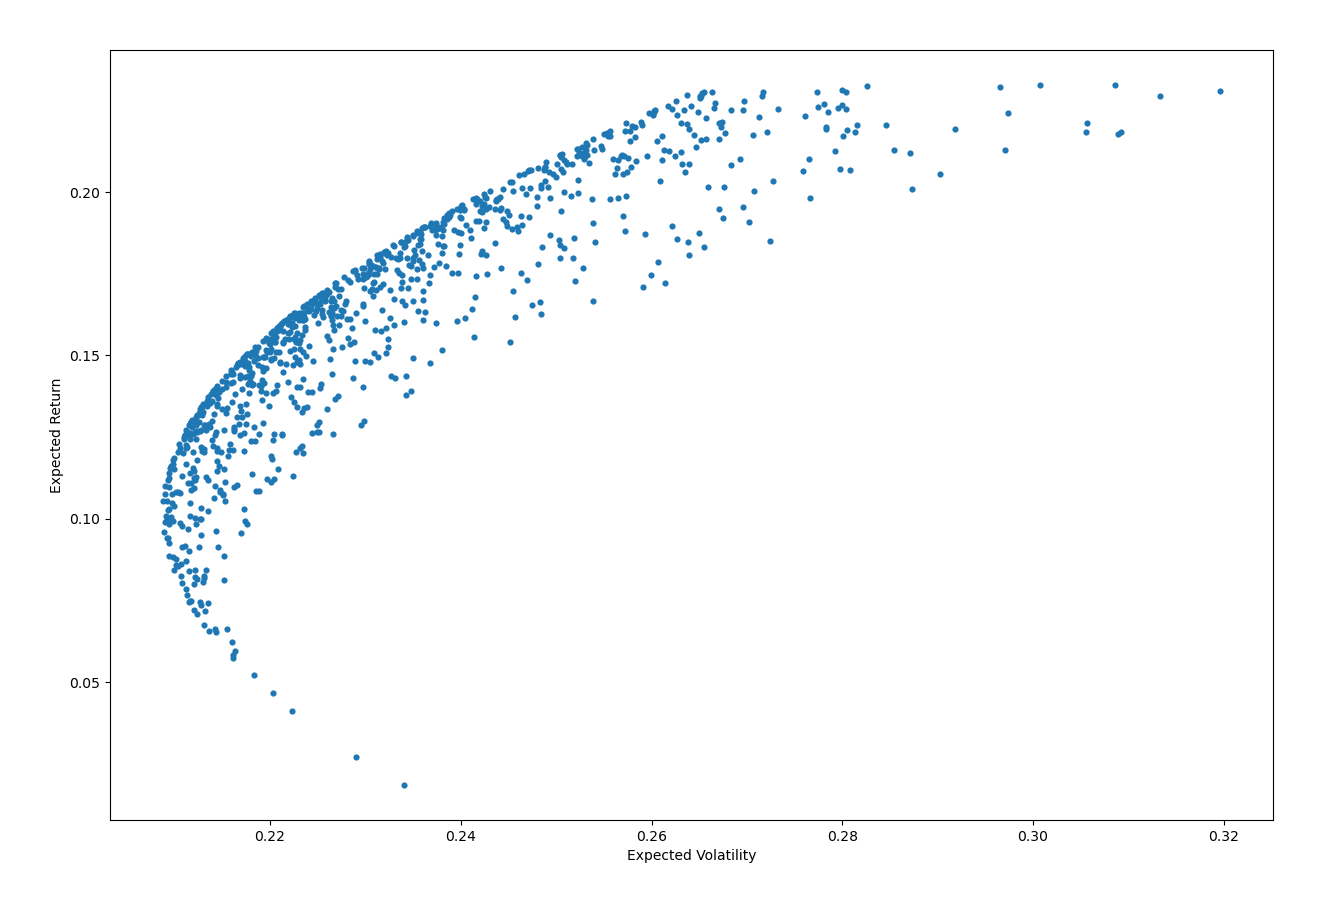

In [88]:
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,10));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

#### Series of functions that calculate the Sharpe Ration and Volatility in order to create an Efficient Frontier. This determines the weights for each stock in the portfolio, given that the risk-free rate is 3% following the US Treasury Bills

In [107]:
def analyze_three_stocks_with_log_returns(df_part2, stock1, stock2, stock3):
    # Filter the DataFrame for the selected stocks
    filtered_df = df_part2[df_part2['Symbol'].isin([stock1, stock2, stock3])]
    
    # Pivot the DataFrame to have stock symbols as columns and dates as index
    pivot_df = filtered_df.pivot_table(index='Date', columns='Symbol', values='Adj Close')
    
    # Calculate log returns
    log_returns = np.log(pivot_df / pivot_df.shift(1)).dropna()
    
    # Calculate mean returns
    mean_log_returns = log_returns.mean()
    
    # Calculate the covariance matrix
    covariance_matrix_log_returns = log_returns.cov()
    
    return pivot_df.columns.tolist(), mean_log_returns, covariance_matrix_log_returns

# Example usage:
stock1 = 'COST'
stock2 = 'MMM'
stock3 = 'AMZN'
symbols, mean_log_returns, covariance_matrix_log_returns = analyze_three_stocks_with_log_returns(df_part2, stock1, stock2, stock3)

print("Selected Stock Symbols:", symbols)
print("\nMean Log Returns:\n", mean_log_returns)
print("\nCovariance Matrix (Log Returns):\n", covariance_matrix_log_returns)




Selected Stock Symbols: ['AMZN', 'COST', 'MMM']

Mean Log Returns:
 Symbol
AMZN    0.000936
COST    0.000833
MMM     0.000060
dtype: float64

Covariance Matrix (Log Returns):
 Symbol      AMZN      COST       MMM
Symbol                              
AMZN    0.000430  0.000120  0.000089
COST    0.000120  0.000181  0.000073
MMM     0.000089  0.000073  0.000223


In [108]:

def maxSR(mean_log_returns, covariance_matrix_log_returns, risk_free_rate=.03, constraintSet=(0, 1)):
    num_assets = len(mean_log_returns)
    
    def portfolio_return(weights):
        return np.dot(weights, mean_log_returns)
    
    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix_log_returns, weights)))
    
    def negative_sharpe_ratio(weights):
        return - (portfolio_return(weights) - risk_free_rate) / portfolio_volatility(weights)
    
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = tuple(constraintSet for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets]
    
    result = minimize(negative_sharpe_ratio, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def minimizeVariance(mean_log_returns, covariance_matrix_log_returns, constraintSet=(0, 1)):
    num_assets = len(mean_log_returns)
    
    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix_log_returns, weights)))
    
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = tuple(constraintSet for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets]
    
    result = minimize(portfolio_volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def portfolioPerformance(weights, mean_log_returns, covariance_matrix_log_returns):
    portfolio_return = np.dot(weights, mean_log_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix_log_returns, weights)))
    return portfolio_return, portfolio_stddev

def portfolioReturn(weights, mean_log_returns, covariance_matrix_log_returns):
    return np.dot(weights, mean_log_returns)

def portfolioVariance(weights, mean_log_returns, covariance_matrix_log_returns):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix_log_returns, weights)))

def efficientOpt(mean_log_returns, covariance_matrix_log_returns, returnTarget, constraintSet=(0, 1)):
    "For each returnTarget, we want to optimize the portfolio for minimum variance"
    num_assets = len(mean_log_returns)
    args = (mean_log_returns, covariance_matrix_log_returns)
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: portfolioReturn(x, mean_log_returns, covariance_matrix_log_returns) - returnTarget},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    )
    bounds = tuple(constraintSet for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets]
    
    effOpt = minimize(portfolioVariance, initial_guess, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return effOpt

def calculatedResults(mean_log_returns, covariance_matrix_log_returns, risk_free_rate=.03, constraintSet=(0, 1)):
    "read in mean, cov matrix, and other financial information"
    "output, Max SR, Min Volatility, efficient frontier"
    # Max Sharpe Ratio Portfolio
    maxSR_Portfolio = maxSR(mean_log_returns, covariance_matrix_log_returns, risk_free_rate, constraintSet)
    maxSR_Returns, maxSR_std = portfolioPerformance(maxSR_Portfolio.x, mean_log_returns, covariance_matrix_log_returns)
    maxSR_Returns, maxSR_std = round(maxSR_Returns * 100, 2), round(maxSR_std * 100, 2)
    maxSR_allocation = pd.DataFrame(maxSR_Portfolio.x, index=mean_log_returns.index, columns=['allocation'])
    maxSR_allocation.allocation = [round(i * 100, 0) for i in maxSR_allocation.allocation]
    
    # Min Volatility Portfolio 
    minVol_Portfolio = minimizeVariance(mean_log_returns, covariance_matrix_log_returns, constraintSet)
    minVol_returns, minVol_std = portfolioPerformance(minVol_Portfolio.x, mean_log_returns, covariance_matrix_log_returns)
    minVol_returns, minVol_std = round(minVol_returns * 100, 2), round(minVol_std * 100, 2)
    minVol_allocation = pd.DataFrame(minVol_Portfolio.x, index=mean_log_returns.index, columns=['allocation'])
    minVol_allocation.allocation = [round(i * 100, 0) for i in minVol_allocation.allocation]

    # Efficient Frontier
    target_returns = np.linspace(minVol_returns / 100, maxSR_Returns / 100, 100)
    efficient_stddevs = []
    efficient_allocations = []
    
    for target in target_returns:
        efficient_portfolio = efficientOpt(mean_log_returns, covariance_matrix_log_returns, target, constraintSet)
        efficient_stddev = portfolioPerformance(efficient_portfolio.x, mean_log_returns, covariance_matrix_log_returns)[1]
        efficient_stddevs.append(efficient_stddev)
        efficient_allocations.append(efficient_portfolio.x)

    efficient_stddevs = [round(std * 100, 2) for std in efficient_stddevs]
    target_returns = [round(ret * 100, 2) for ret in target_returns]
    
    return maxSR_Returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation, efficient_stddevs, target_returns, efficient_allocations

# Graph Function
def EF_graph(mean_log_returns, covariance_matrix_log_returns, riskFreeRate=.03, constraintSet=(0, 1)):
    "return a graph, plotting minVol, maxSR and efficient frontier"
    maxSR_Returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturn, efficient_allocations = calculatedResults(mean_log_returns, covariance_matrix_log_returns, riskFreeRate, constraintSet)
    
    # Max SR
    MaxSharpeRatio = go.Scatter(
        name="Maximum Sharpe Ratio",
        mode="markers",
        x=[maxSR_std],
        y=[maxSR_Returns],
        marker=dict(color='red', size=14, line=dict(width=3, color='black')),
        text=[maxSR_allocation.to_dict()['allocation']],
        hoverinfo='text'
    )
    
    # Min Vol
    MinVol = go.Scatter(
        name="Minimum Volatility",
        mode="markers",
        x=[minVol_std],
        y=[minVol_returns],
        marker=dict(color='green', size=14, line=dict(width=3, color='black')),
        text=[minVol_allocation.to_dict()['allocation']],
        hoverinfo='text'
    )    
         
    # Efficient Frontier
    efficient_text = [
        "<br>".join([f"{symbol}: {round(weight*100, 2)}%" for symbol, weight in zip(mean_log_returns.index, alloc)])
        for alloc in efficient_allocations
    ]
    
    EF_curve = go.Scatter(
        name="Efficient Frontier",
        mode="lines",
        x=efficientList,
        y=targetReturn,
        line=dict(color='black', width=3, dash='dashdot'),
        text=efficient_text,
        hoverinfo='text'
    )    
    
    data = [MaxSharpeRatio, MinVol, EF_curve]
    
    layout = go.Layout(
        title="Portfolio Optimisation with the Efficient Frontier",
        yaxis=dict(title="Annualized Return (%)"),
        xaxis=dict(title="Annualized Volatility (%)"),
        showlegend=True,
        legend=dict(
            x=0.75, 
            y=0, 
            traceorder='normal', 
            bgcolor='#E2E2E2', 
            bordercolor='black', 
            borderwidth=2),
        width=800,
        height=600,
    )
        
    fig = go.Figure(data=data, layout=layout)   
    
    return fig.show()

EF_graph(mean_log_returns, covariance_matrix_log_returns)



#### Modern Portfolio Theory - maximizing expected returns based on the risk 

portofolio risk 

diversification 


Risk & Reward 

Variance & Expectation 

covariance between assets: 

level of risk is what the user chooses.
We have to estimate based off of historical pricing. 

Unsystematic risk - the risk that is inherent in a specific industry - diversifiable risk (airline, travel, retail)
Systematic risk - refers to the risk inherent to the entire market or market segment - nondiversiviable risk (depends on overall, economic indicators - that would affect the risk the investor wants to take)

diversification is about covariance and correlation: 
highly correlated to SP - the move together
lowly correlated to SP - the do not move together - trajectory is based off other market issues

covariance between asset 1 & 2 can affect the portolios diversification

it is an optimization problem - choose the **weights** to maximum return and minimize variance. 

minimize portfolio variance 
maximize portfolio return 

max sharpe ration - return / volatilty 
min volatility  - lower return / lower volatility


The risk-free rate is a critical input in financial analysis, helping compare the risk-adjusted returns of different investments. For publicly traded stocks, use the yield on appropriate U.S. Treasury securities as the risk-free rate. The choice of short-term or long-term yields depends on the investment horizon of your analysis.

To illustrate, let’s assume you are conducting a long-term analysis of two stocks and decide to use the 10-year U.S. Treasury bond yield as your risk-free rate. If the current yield on a 10-year U.S. Treasury bond is 3%, this would be your risk-free rate.



### Part 2 Conclusion: 
We can now allocate the best optimized weights for each of our assets that we selected in creating our portfolio. 

## Part 3 Predictive Model for future stock prices

We will attempt to use predictive models to for stock prices, to get an idea about the value of our portfolio

**This code is in the master notebook**